# Fit Arinyo model from measured P3D

At PIC you need to use the lace_camb environment (we need to use CAMB)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 10
import numpy as np
import matplotlib.pyplot as plt
import pickle
from lace.cosmo import camb_cosmo
from lace_manager.p3d import model_p3d_arinyo
from lace_manager.p3d import fit_p3d
from lace_manager.postprocess import measure_flux_power

### Setup Arinyo model

In [3]:
# specify cosmology
cosmo=camb_cosmo.get_cosmology()
zs=np.linspace(2.0,4.5,11)
camb_results=camb_cosmo.get_camb_results(cosmo,zs=zs)

In [4]:
# construct Arinyo model for flux P3D
model=model_p3d_arinyo.ArinyoModel(cosmo,zs,camb_results)

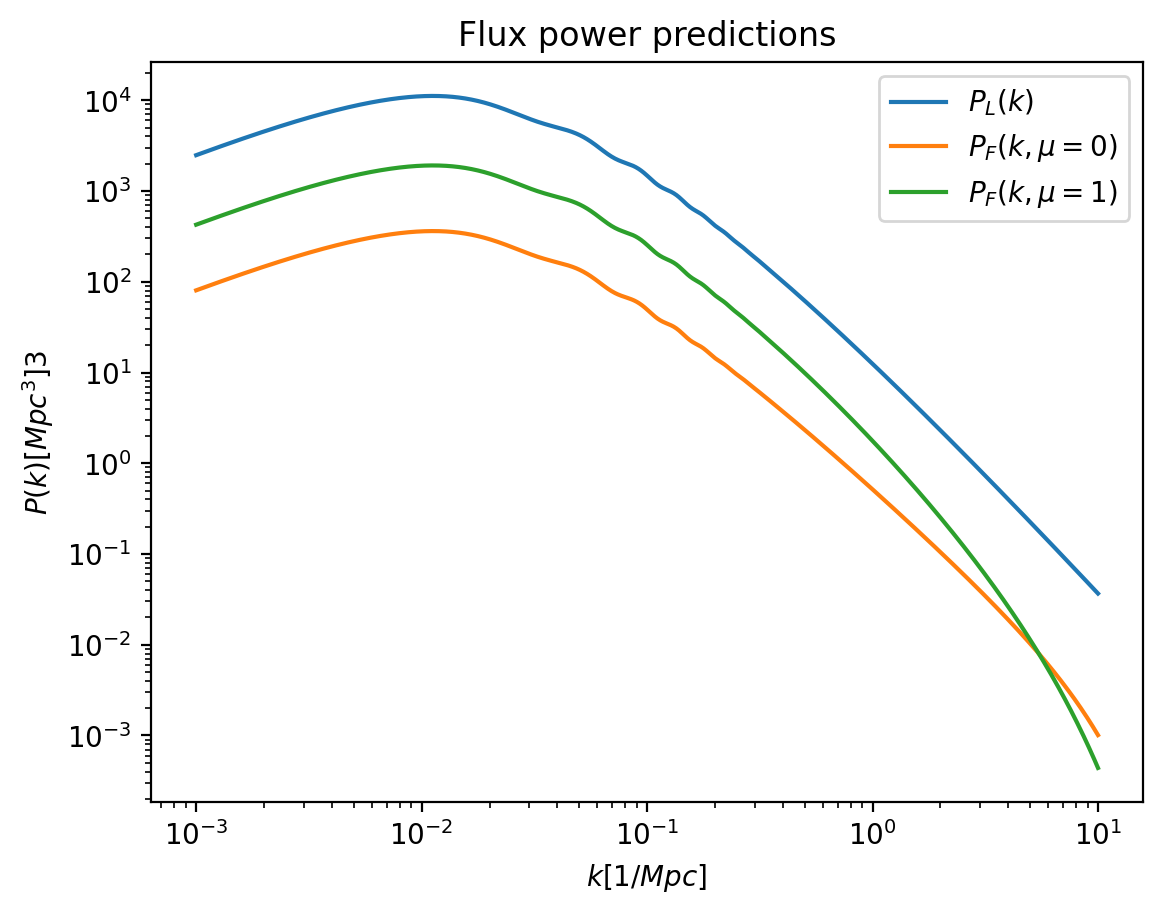

In [5]:
# make plot for a couple of mu bins
z=2.4
lin_k=np.logspace(-3,1,1000)
lin_p=model.linP_Mpc(z,lin_k)
plt.title(r"Flux power predictions")
plt.xlabel(r"$k [1/Mpc]$")
plt.ylabel(r"$P(k) [Mpc^3]3$")
plt.loglog(lin_k,lin_p,label=r'$P_L(k)$')
plt.loglog(lin_k,model.P3D_Mpc(z,lin_k,mu=0.0),label=r'$P_F(k,\mu=0)$')
plt.loglog(lin_k,model.P3D_Mpc(z,lin_k,mu=1.0),label=r'$P_F(k,\mu=1)$')
plt.legend();

### Read measured P3D

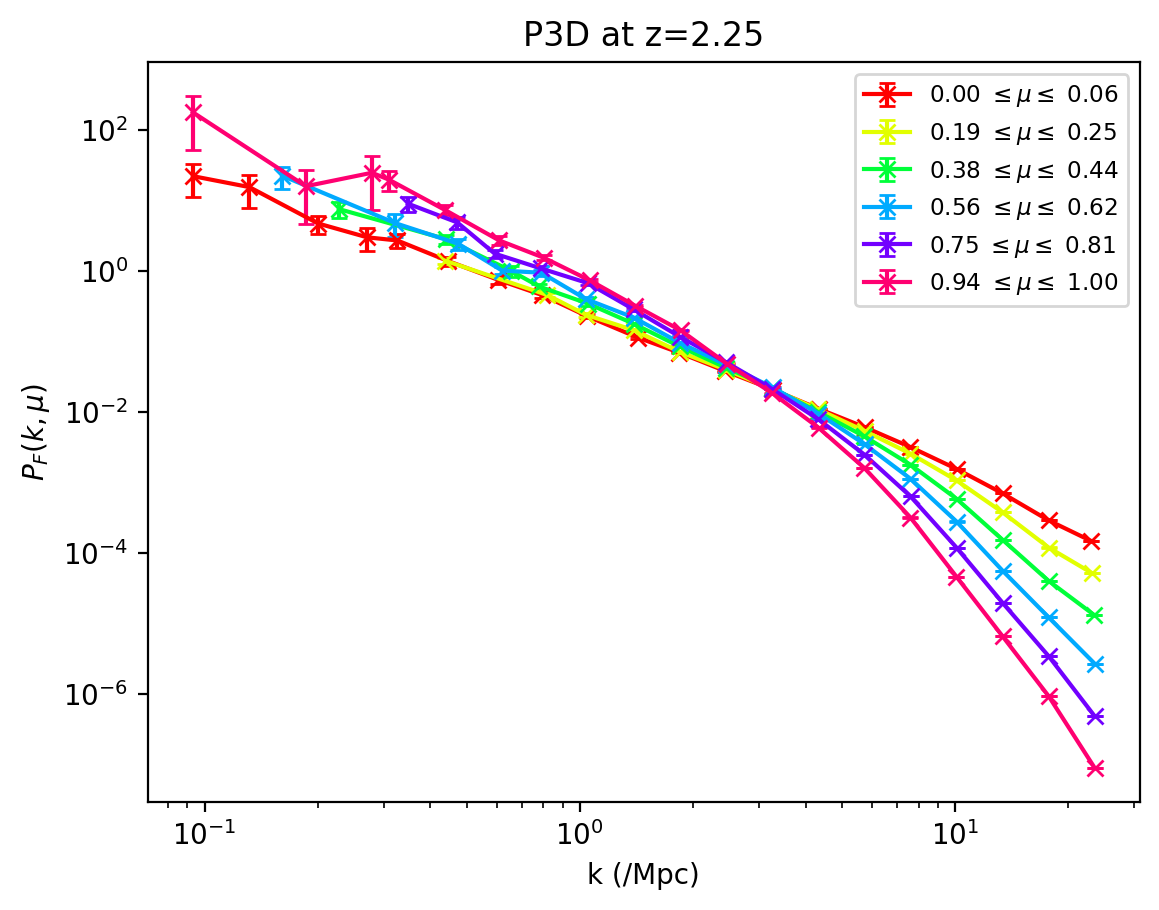

In [6]:
fname='test_p3d.p'
data=pickle.load(open(fname,"rb"))
measure_flux_power.plot_p3d(data)

### Define P3D fitter object

In [7]:
fit=fit_p3d.FitP3D(data,model)

In [8]:
# try to fit the measured P3D with / without freeing q_2 parameter 
parameters={'bias':-0.12,'beta':1.4,'d1_q1':0.4,
            'd1_kvav':0.6,'d1_av':0.3,'d1_bv':1.5,'d1_kp':18.0}
parameters_q2={'bias':-0.12,'beta':1.4,'d1_q1':0.4,'d1_q2':0.2,
            'd1_kvav':0.6,'d1_av':0.3,'d1_bv':1.5,'d1_kp':18.0}

initial chi2 = 10226.525392017633
final chi2 = 57.654646634294565
initial chi2 = 260.7104314106631
final chi2 = 53.34126720304131


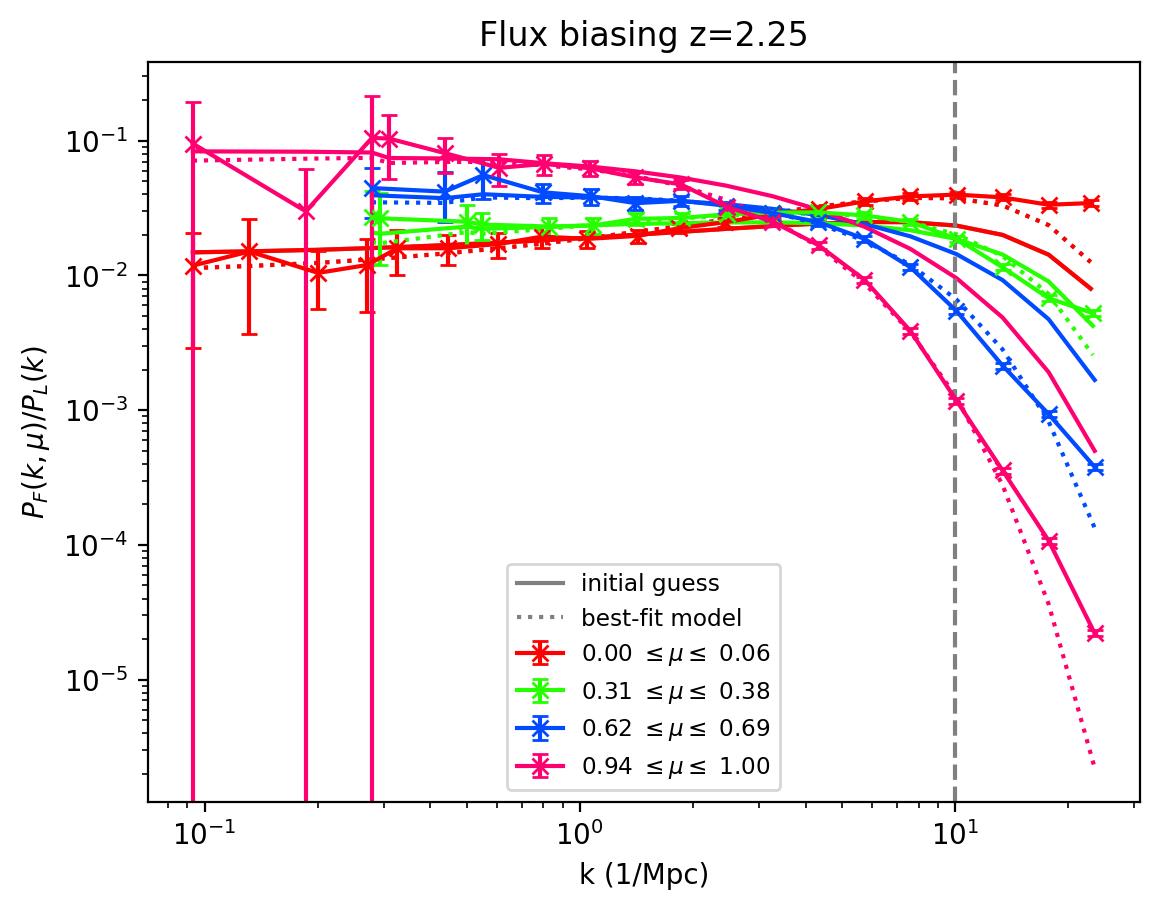

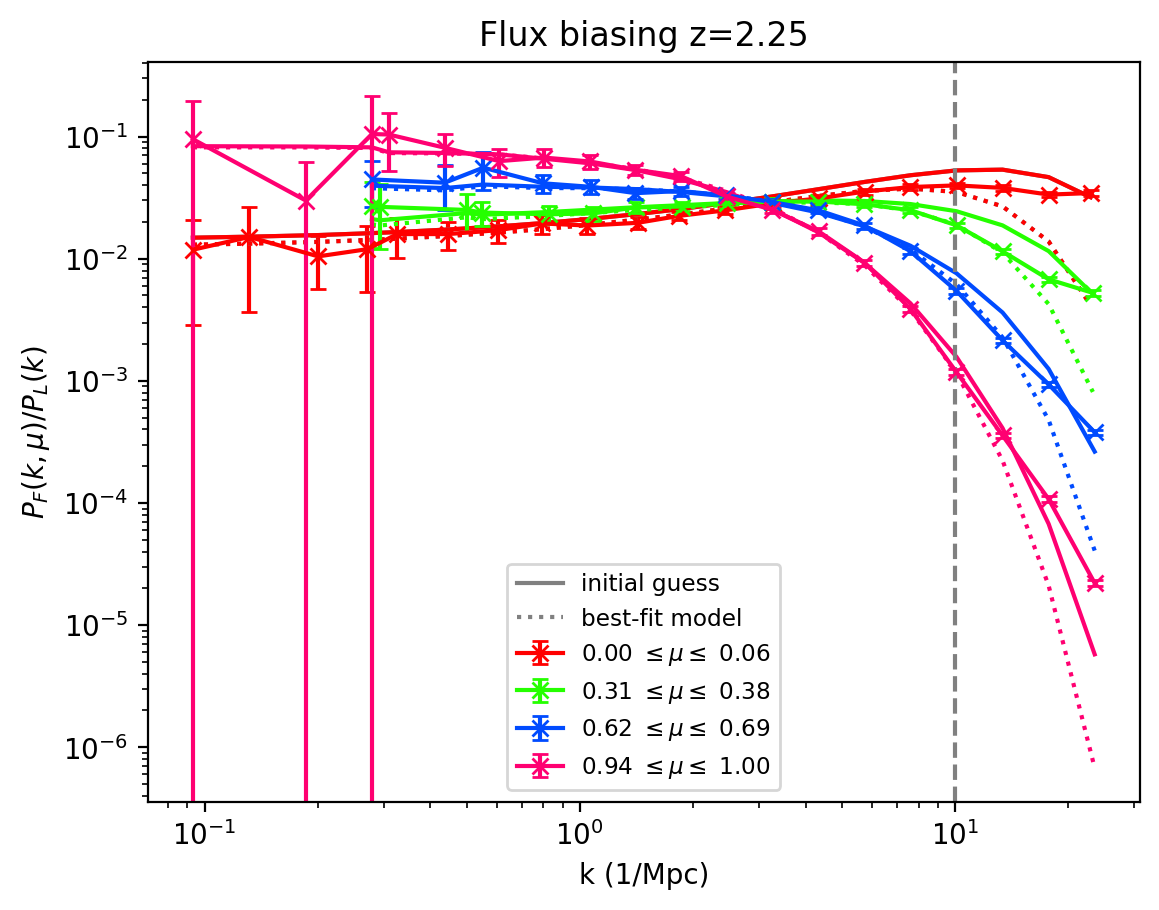

In [9]:
for params in [parameters,parameters_q2]:
    print('initial chi2 =',fit.get_chi2(params))
    # run fitter and store best-fit values
    results,best_fit_params=fit.maximize_likelihood(params)
    print('final chi2 =',fit.get_chi2(best_fit_params))
    plt.figure()
    fit.plot_p3d_ratio(downsample_mu=5,parameters=params,label='initial guess',
                   extra_parameters=best_fit_params,extra_label='best-fit model')